In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import math
from collections import Counter
from random import random
path = "./Datasets/Saber_reducido.csv"

In [8]:
def pertenece(a, b):
    for i in range(1,len(b)):
        if a>= b[i-1] and a<= b[i]:
            return i-1

def reemplazoGeneralizado(data):
    columns = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA","ESTU_NSE_INDIVIDUAL"]
    for c in columns:
        aux4 =0
        reemplazables = []
        if '-' in data.groupby(c).count().index:
            reemplazables.append(data.groupby(c).get_group('-').index.values)
        opciones = []
        porcentajes = [0]
        opciones.append(list(data.groupby(c).size().axes[0]))
        aux = len(opciones[0])
        if '-' in opciones[0]:
            opciones[0].remove('-')
            aux = aux-1
            aux2 = (data.groupby(c).size()['-']/data.shape[0])/aux
        else:
            continue
        for i in range(aux):
            aux3 = porcentajes.pop()
            porcentajes.append(aux3)
            a= float(data.groupby(c).size()[opciones[0][i]]/data.shape[0])+aux2+aux3
            porcentajes.append(a)
        if len(reemplazables) > 0:   
            for r in reemplazables[0]:
                randNumber = random()
                for j in range(len(opciones[0])):
                    lugar = pertenece(randNumber, porcentajes)
                    data.at[r, c] = opciones[0][lugar]

In [9]:
Keys = ["ELECTRODOMESTICOS","ESTU_GENERO", "ESTU_FECHANACIMIENTO", "PERIODO", "ESTU_DEPTO_RESIDE", "FAMI_ESTRATOVIVIENDA", "FAMI_PERSONASHOGAR", "FAMI_CUARTOSHOGAR", "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "FAMI_TRABAJOLABORPADRE", "FAMI_TRABAJOLABORMADRE", "FAMI_NUMLIBROS", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE", "ESTU_DEDICACIONLECTURADIARIA", "ESTU_DEDICACIONINTERNET", "COLE_NATURALEZA", "COLE_CARACTER", "COLE_AREA_UBICACION", "COLE_JORNADA", "PUNT_LECTURA_CRITICA", "PUNT_MATEMATICAS", "PUNT_C_NATURALES", "PUNT_SOCIALES_CIUDADANAS", "PUNT_INGLES", "PUNT_GLOBAL", "ESTU_NSE_ESTABLECIMIENTO", "ESTU_INSE_INDIVIDUAL", "ESTU_NSE_INDIVIDUAL"]

In [3]:
tmp = ["ESTU_GENERO","ESTU_FECHANACIMIENTO","PERIODO","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_PERSONASHOGAR","FAMI_CUARTOSHOGAR","FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_TRABAJOLABORPADRE","FAMI_TRABAJOLABORMADRE","FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS","FAMI_NUMLIBROS","FAMI_COMELECHEDERIVADOS","FAMI_COMECARNEPESCADOHUEVO","FAMI_COMECEREALFRUTOSLEGUMBRE","FAMI_SITUACIONECONOMICA","ESTU_DEDICACIONLECTURADIARIA ","ESTU_DEDICACIONINTERNET","COLE_NOMBRE_ESTABLECIMIENTO","COLE_NATURALEZA COLE_BILINGUE","COLE_CARACTER","COLE_AREA_UBICACION","COLE_JORNADA","PUNT_LECTURA_CRITICA","PERCENTIL_LECTURA_CRITICA","PUNT_MATEMATICAS","PERCENTIL_MATEMATICAS","PUNT_C_NATURALES","PERCENTIL_C_NATURALES","PUNT_SOCIALES_CIUDADANAS","PERCENTIL_SOCIALES_CIUDADANAS","PUNT_INGLES","PERCENTIL_INGLES","PUNT_GLOBAL","PERCENTIL_GLOBAL","ESTU_NSE_ESTABLECIMIENTO","ESTU_INSE_INDIVIDUAL","ESTU_NSE_INDIVIDUAL",
]

for element in Keys:
    if element not in tmp:
        print(element)


ESTU_DEDICACIONLECTURADIARIA
COLE_NATURALEZA


In [4]:
data = pd.read_csv(path, low_memory=False)

In [10]:
reemplazoGeneralizado(data)

In [122]:
data.head()

,ELECTRODOMESTICOS,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,...,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL
0,10010,M,16,20182,ATLANTICO,Estrato 2,7 a 8,Cuatro,No sabe,No sabe,...,MAÑANA,63,69,54,57,65.0,305,2.0,53.169929,NSE3
1,10010,M,17,20182,CORDOBA,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Primaria completa,...,UNICA,54,50,50,40,48.0,242,2.0,45.062853,NSE2
2,0,M,16,20182,VALLE,Estrato 2,1 a 2,Dos,No sabe,Técnica o tecnológica incompleta,...,MAÑANA,59,43,46,45,47.0,241,2.0,44.806936,NSE2
3,11101,M,17,20182,BOYACA,Estrato 3,3 a 4,Tres,No sabe,Educación profesional completa,...,MAÑANA,61,60,60,67,63.0,310,3.0,73.630225,NSE4
4,10000,M,19,20182,BOGOTA,Estrato 2,7 a 8,Tres,No sabe,No sabe,...,COMPLETA,56,51,48,49,56.0,257,3.0,49.391007,NSE2


In [123]:
data.iloc[0]

ELECTRODOMESTICOS                                                       10010
ESTU_GENERO                                                                 M
ESTU_FECHANACIMIENTO                                                       16
PERIODO                                                                 20182
ESTU_DEPTO_RESIDE                                                   ATLANTICO
FAMI_ESTRATOVIVIENDA                                                Estrato 2
FAMI_PERSONASHOGAR                                                      7 a 8
FAMI_CUARTOSHOGAR                                                      Cuatro
FAMI_EDUCACIONPADRE                                                   No sabe
FAMI_EDUCACIONMADRE                                                   No sabe
FAMI_TRABAJOLABORPADRE           Es vendedor o trabaja en atención al público
FAMI_TRABAJOLABORMADRE           Es vendedor o trabaja en atención al público
FAMI_NUMLIBROS                                                26

In [185]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()  

ESTU_NSE_INDIVIDUAL
-        21940
NSE1    160992
NSE2    386030
NSE3    366929
NSE4     79428
dtype: int64

In [97]:
type(data.groupby("FAMI_NUMLIBROS").size())

pandas.core.series.Series

In [106]:
data.groupby("ESTU_GENERO").get_group('-').index.values

array([ 548477,  608990,  869415,  950709, 1029787], dtype=int64)

In [14]:
data.groupby("FAMI_TRABAJOLABORMADRE").size() 

FAMI_TRABAJOLABORMADRE
Es agricultor, pesquero o jornalero                                                                      28836
Es dueño de un negocio grande, tiene un cargo de nivel directivo o gerencial                             15201
Es dueño de un negocio pequeño (tiene pocos empleados o no tiene, por ejemplo tienda, papelería, etc     87756
Es operario de máquinas o conduce vehículos (taxita, chofer)                                             16736
Es vendedor o trabaja en atención al público                                                             79004
No aplica                                                                                                48273
No sabe                                                                                                  25129
Pensionado                                                                                                6691
Tiene un trabajo de tipo auxiliar administrativo (por ejemplo, secretario o asistente)   

In [13]:
data.groupby("FAMI_EDUCACIONMADRE").size()

FAMI_EDUCACIONMADRE
Educación profesional completa          104911
Educación profesional incompleta         24840
Ninguno                                  21274
No Aplica                                 1784
No sabe                                  17689
Postgrado                                21297
Primaria completa                       112486
Primaria incompleta                     158239
Secundaria (Bachillerato) completa      261793
Secundaria (Bachillerato) incompleta    157272
Técnica o tecnológica completa          102563
Técnica o tecnológica incompleta         31171
dtype: int64

In [12]:
data.groupby("FAMI_EDUCACIONPADRE").size()

FAMI_EDUCACIONPADRE
Educación profesional completa           92451
Educación profesional incompleta         20191
Ninguno                                  34380
No Aplica                                10207
No sabe                                  62908
Postgrado                                18757
Primaria completa                       111425
Primaria incompleta                     201070
Secundaria (Bachillerato) completa      226020
Secundaria (Bachillerato) incompleta    146955
Técnica o tecnológica completa           69852
Técnica o tecnológica incompleta         21103
dtype: int64

In [11]:
data.groupby("FAMI_CUARTOSHOGAR").size()

FAMI_CUARTOSHOGAR
Cinco          41010
Cuatro        134533
Dos           365560
Seis o mas     21823
Tres          399555
Uno            52838
dtype: int64

In [79]:
data.groupby("FAMI_PERSONASHOGAR").size()

FAMI_PERSONASHOGAR
-           27460
1 a 2       74408
3 a 4      490759
5 a 6      337252
7 a 8       90041
9 o más     36380
dtype: int64

## Histogramas

In [62]:
data.groupby("COLE_JORNADA").size()

COLE_JORNADA
COMPLETA    191426
MAÑANA      544050
NOCHE        51132
SABATINA     56621
TARDE       137263
UNICA        75808
dtype: int64

In [63]:
data.groupby("FAMI_ESTRATOVIVIENDA").size()/data.shape[0] * 100

FAMI_ESTRATOVIVIENDA
Estrato 1      33.156395
Estrato 2      36.604090
Estrato 3      20.448073
Estrato 4       4.727066
Estrato 5       1.578339
Estrato 6       0.775821
Sin Estrato     2.710215
dtype: float64

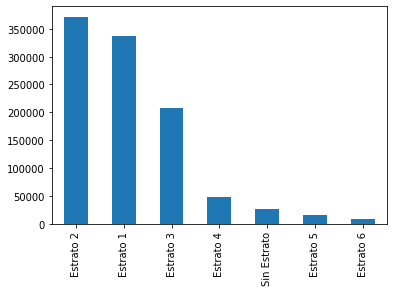

In [15]:
data['FAMI_ESTRATOVIVIENDA'].value_counts().plot(kind='bar')

In [113]:
data.groupby("ESTU_FECHANACIMIENTO").size()

ESTU_FECHANACIMIENTO
14      1425
15     38438
16    384236
17    347952
18    174470
19     65969
20     22400
21     10148
22      6127
dtype: int64

<class 'matplotlib.axes._subplots.AxesSubplot'>


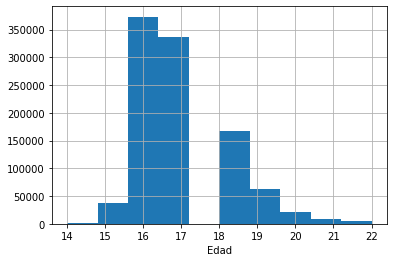

In [16]:
hist = data["ESTU_FECHANACIMIENTO"].hist()
hist.set_xlabel("Edad")
print(type(hist))

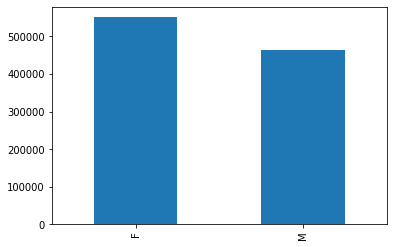

In [17]:
data['ESTU_GENERO'].value_counts().plot(kind='bar')

In [18]:
#data.groupby("ESTU_INSE_INDIVIDUAL").size()
print("min",data["ESTU_INSE_INDIVIDUAL"].min())
print("max",data["ESTU_INSE_INDIVIDUAL"].max())


min 12.53886749
max 84.83636609


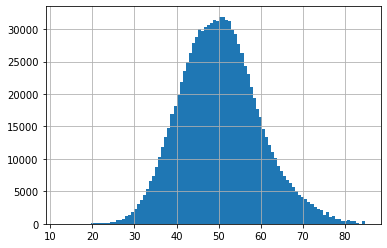

In [117]:
data['ESTU_INSE_INDIVIDUAL'].hist(bins = 100)

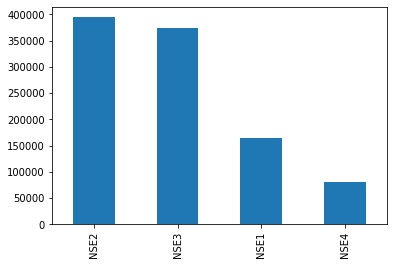

In [19]:
data["ESTU_NSE_INDIVIDUAL"].value_counts().plot(kind ='bar')

In [20]:
data.groupby("ESTU_NSE_INDIVIDUAL").size()

ESTU_NSE_INDIVIDUAL
NSE1    164587
NSE2    394538
NSE3    374892
NSE4     81302
dtype: int64

In [137]:
n = len(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size())
for i in range(1,n+1):
    print(data.groupby("ESTU_NSE_ESTABLECIMIENTO").size()[i])

72076
545146
351248
45744


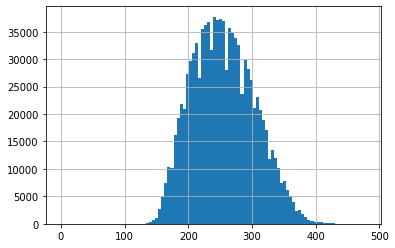

In [21]:
data["PUNT_GLOBAL"].hist(bins = 100)

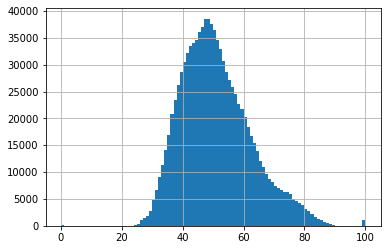

In [22]:
data["PUNT_INGLES"].hist(bins = 100)

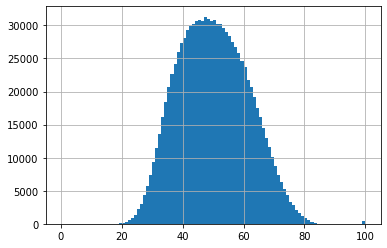

In [145]:
data["PUNT_SOCIALES_CIUDADANAS"].hist(bins = 100)

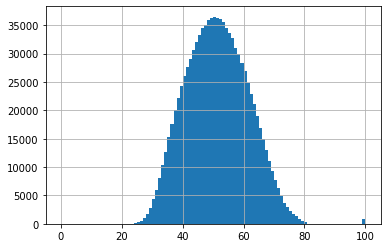

In [146]:
data["PUNT_C_NATURALES"].hist(bins = 100)

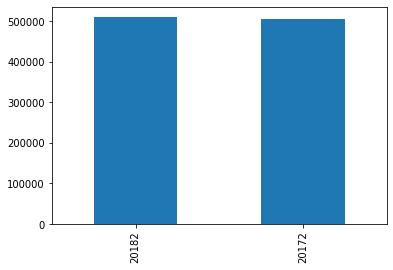

In [149]:
data["PERIODO"].value_counts().plot(kind ='bar')

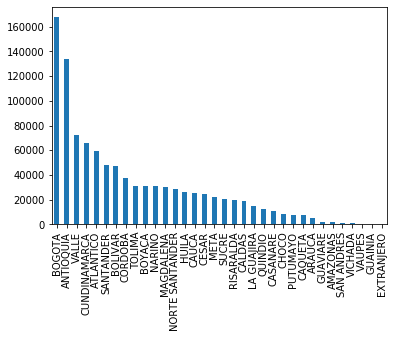

In [23]:
data["ESTU_DEPTO_RESIDE"].value_counts().plot(kind ='bar')

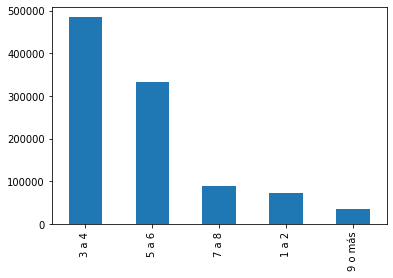

In [24]:
data["FAMI_PERSONASHOGAR"].value_counts().plot(kind ='bar')

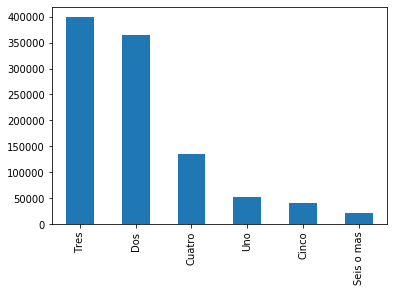

In [25]:
data["FAMI_CUARTOSHOGAR"].value_counts().plot(kind ='bar')

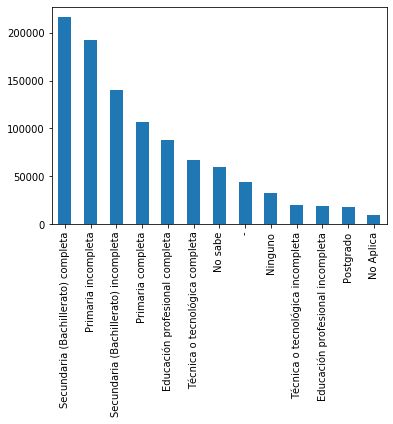

In [154]:
data["FAMI_EDUCACIONPADRE"].value_counts().plot(kind ='bar')

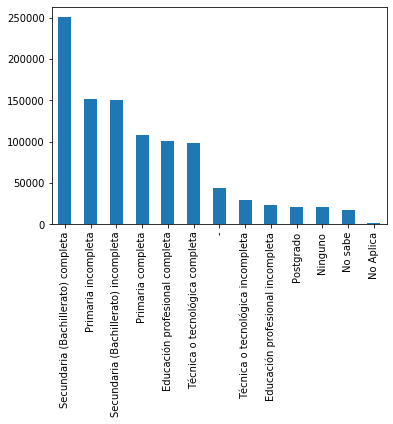

In [155]:
data["FAMI_EDUCACIONMADRE"].value_counts().plot(kind ='bar')

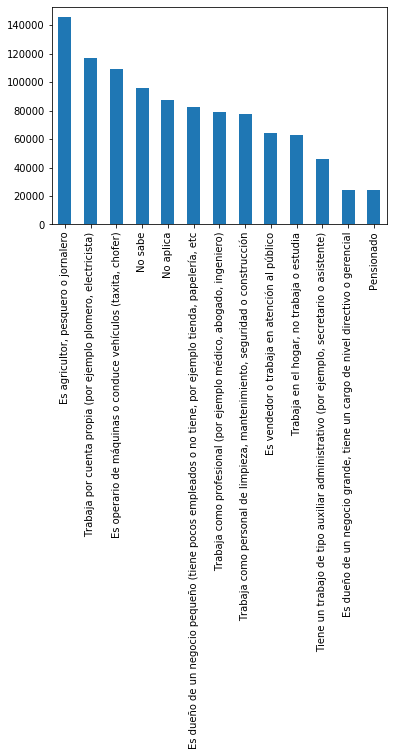

In [26]:
data["FAMI_TRABAJOLABORPADRE"].value_counts().plot(kind ='bar')


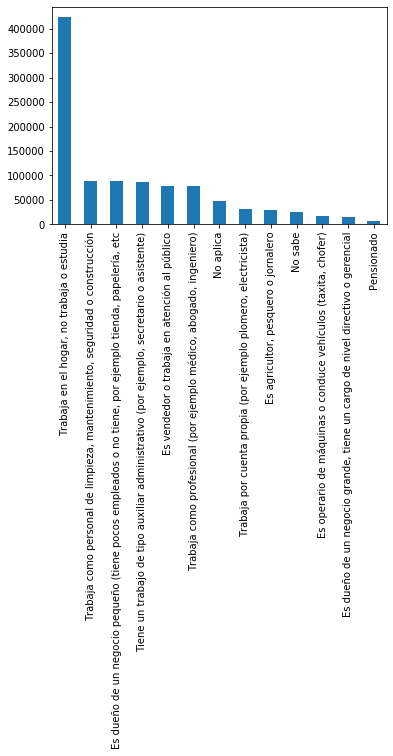

In [27]:
data["FAMI_TRABAJOLABORMADRE"].value_counts().plot(kind ='bar')

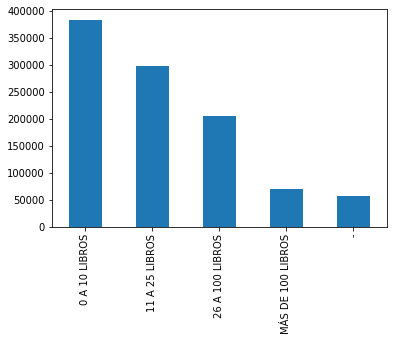

In [160]:
data["FAMI_NUMLIBROS"].value_counts().plot(kind ='bar')

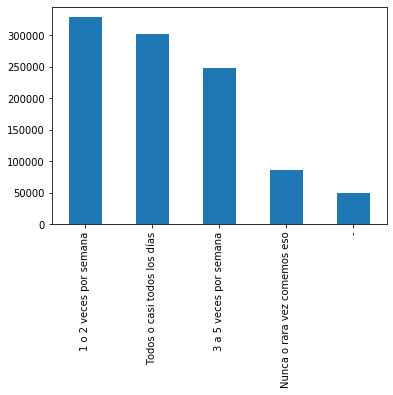

In [161]:
data["FAMI_COMELECHEDERIVADOS"].value_counts().plot(kind ='bar')

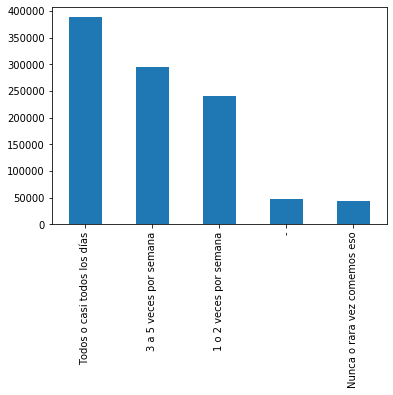

In [162]:
data["FAMI_COMECARNEPESCADOHUEVO"].value_counts().plot(kind ='bar')

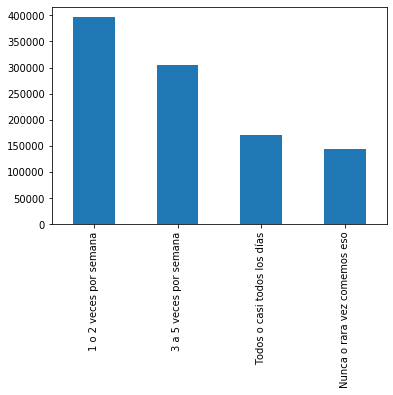

In [28]:
data["FAMI_COMECEREALFRUTOSLEGUMBRE"].value_counts().plot(kind ='bar')

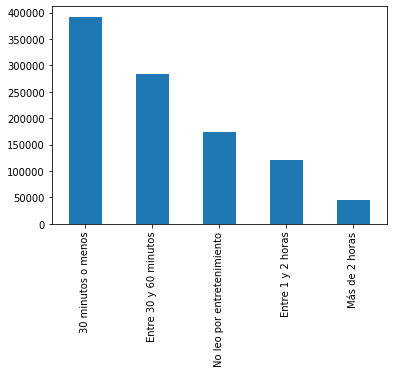

In [29]:
data["ESTU_DEDICACIONLECTURADIARIA"].value_counts().plot(kind ='bar')

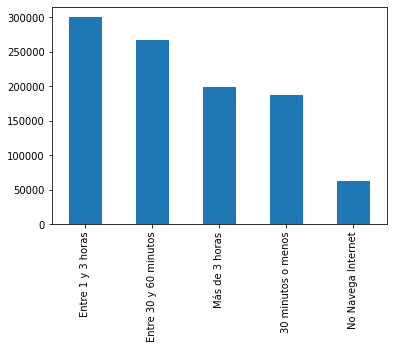

In [30]:
data["ESTU_DEDICACIONINTERNET"].value_counts().plot(kind ='bar')

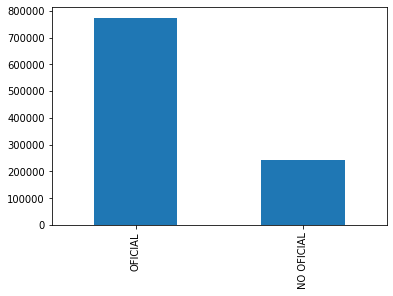

In [166]:
data["COLE_NATURALEZA"].value_counts().plot(kind ='bar')

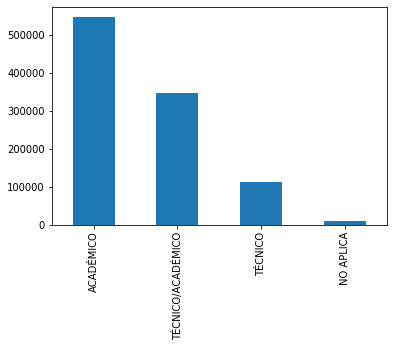

In [31]:
data["COLE_CARACTER"].value_counts().plot(kind ='bar')

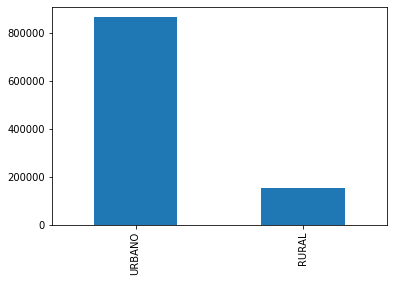

In [168]:
data["COLE_AREA_UBICACION"].value_counts().plot(kind ='bar')

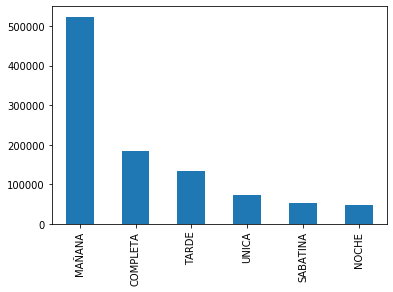

In [169]:
data["COLE_JORNADA"].value_counts().plot(kind ='bar')

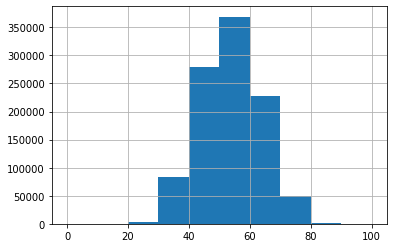

In [176]:
data["PUNT_LECTURA_CRITICA"].hist()

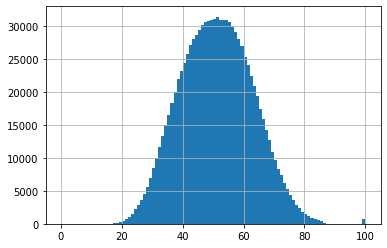

In [180]:
data["PUNT_MATEMATICAS"].hist(bins = 100)

In [179]:
data.groupby("PUNT_MATEMATICAS").size()

PUNT_MATEMATICAS
0          6
15        11
16        21
17        77
18       147
19       260
20       413
21       707
22      1006
23      1530
24      2189
25      2874
26      3623
27      4589
28      5628
29      6930
30      8411
31      9926
32     11642
33     13301
34     14968
35     16488
36     18272
37     20024
38     21938
39     23150
40     24453
41     25772
42     27210
43     28068
       ...  
59     26933
60     25288
61     24149
62     22502
63     20927
64     19414
65     17402
66     15844
67     14263
68     12690
69     10888
70      9628
71      8272
72      7350
73      6181
74      5307
75      4317
76      3574
77      2830
78      2329
79      1866
80      1459
81      1197
82       925
83       660
84       516
85       391
86        67
87         5
100      790
Length: 75, dtype: int64

In [157]:
arr = ["FAMI_TRABAJOLABORPADRE",
"FAMI_TRABAJOLABORMADRE",
"FAMI_NUMLIBROS",
"FAMI_COMELECHEDERIVADOS",
"FAMI_COMECARNEPESCADOHUEVO",
"FAMI_COMECEREALFRUTOSLEGUMBRE",
"ESTU_DEDICACIONLECTURADIARIA",
"ESTU_DEDICACIONINTERNET",
"COLE_NATURALEZA",
"COLE_CARACTER",
"COLE_AREA_UBICACION",
"COLE_JORNADA",
"PUNT_LECTURA_CRITICA",
"PUNT_MATEMATICAS"
]
for element in arr:
    print("data[\""+element+"\"].value_counts().plot(kind ='bar')")

data["FAMI_TRABAJOLABORPADRE"].value_counts().plot(kind ='bar')
data["FAMI_TRABAJOLABORMADRE"].value_counts().plot(kind ='bar')
data["FAMI_NUMLIBROS"].value_counts().plot(kind ='bar')
data["FAMI_COMELECHEDERIVADOS"].value_counts().plot(kind ='bar')
data["FAMI_COMECARNEPESCADOHUEVO"].value_counts().plot(kind ='bar')
data["FAMI_COMECEREALFRUTOSLEGUMBRE"].value_counts().plot(kind ='bar')
data["ESTU_DEDICACIONLECTURADIARIA"].value_counts().plot(kind ='bar')
data["ESTU_DEDICACIONINTERNET"].value_counts().plot(kind ='bar')
data["COLE_NATURALEZA"].value_counts().plot(kind ='bar')
data["COLE_CARACTER"].value_counts().plot(kind ='bar')
data["COLE_AREA_UBICACION"].value_counts().plot(kind ='bar')
data["COLE_JORNADA"].value_counts().plot(kind ='bar')
data["PUNT_LECTURA_CRITICA"].value_counts().plot(kind ='bar')
data["PUNT_MATEMATICAS"].value_counts().plot(kind ='bar')


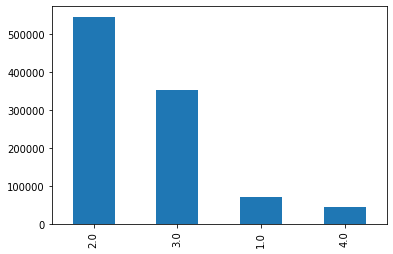

In [32]:
data["ESTU_NSE_ESTABLECIMIENTO"].value_counts().plot(kind ='bar')

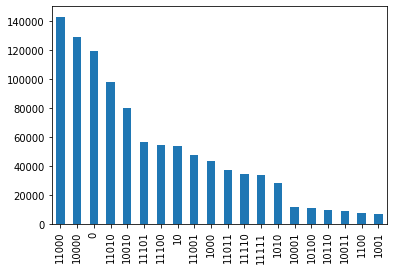

In [124]:
data["ELECTRODOMESTICOS"].value_counts().plot(kind ='bar')

In [125]:
data.groupby("ELECTRODOMESTICOS").size().sort_values(ascending=False)/data.shape[0]*100

ELECTRODOMESTICOS
11000    14.087395
10000    12.695222
0        11.784966
11010     9.678732
10010     7.873683
11101     5.564458
11100     5.365407
10        5.284349
11001     4.715168
1000      4.273238
11011     3.668896
11110     3.372044
11111     3.341314
1010      2.773611
10001     1.161901
10100     1.081335
10110     0.959994
10011     0.912915
1100      0.755231
1001      0.650140
dtype: float64

In [55]:
0.274922+0.230995+0.211966+0.062861+0.056329

0.8370729999999998

In [56]:
0.557512+0.507337+0.475717+0.425447+0.409827+0.335889+0.289028+0.274922+0.230995+0.211966+0.062861+0.056329

3.83783

In [58]:
3.83783*data.shape[0]/100

40538.998289999996

In [72]:
data.shape

(1056300, 31)

In [107]:
print(data.PUNT_GLOBAL.corr(data.ESTU_INSE_INDIVIDUAL, method="pearson"))

0.4294009306324509


In [109]:
data.corr(method="pearson")

,ELECTRODOMESTICOS,ESTU_FECHANACIMIENTO,PERIODO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_INSE_INDIVIDUAL
ELECTRODOMESTICOS,1.000000,-0.132771,0.005795,0.166557,0.167326,0.170000,0.154711,0.207319,0.187009,0.299027,0.493738
ESTU_FECHANACIMIENTO,-0.132771,1.000000,-0.003653,-0.264884,-0.303546,-0.290263,-0.245416,-0.266743,-0.306775,-0.151768,-0.227964
PERIODO,0.005795,-0.003653,1.000000,-0.032783,0.005460,-0.083097,-0.089231,0.047297,-0.046033,0.023115,-0.017222
PUNT_LECTURA_CRITICA,0.166557,-0.264884,-0.032783,1.000000,0.737252,0.749610,0.802158,0.660216,0.895998,0.382037,0.384147
PUNT_MATEMATICAS,0.167326,-0.303546,0.005460,0.737252,1.000000,0.798273,0.744886,0.662650,0.904419,0.373221,0.377802
PUNT_C_NATURALES,0.170000,-0.290263,-0.083097,0.749610,0.798273,1.000000,0.798105,0.680685,0.915591,0.359810,0.370571
PUNT_SOCIALES_CIUDADANAS,0.154711,-0.245416,-0.089231,0.802158,0.744886,0.798105,1.000000,0.669509,0.918097,0.370207,0.375087
PUNT_INGLES,0.207319,-0.266743,0.047297,0.660216,0.662650,0.680685,0.669509,1.000000,0.774029,0.470131,0.484501
PUNT_GLOBAL,0.187009,-0.306775,-0.046033,0.895998,0.904419,0.915591,0.918097,0.774029,1.000000,0.422414,0.429401
ESTU_NSE_ESTABLECIMIENTO,0.299027,-0.151768,0.023115,0.382037,0.373221,0.359810,0.370207,0.470131,0.422414,1.000000,0.627401


## Diagramas de caja

Text(0.5, 0, 'Edad')

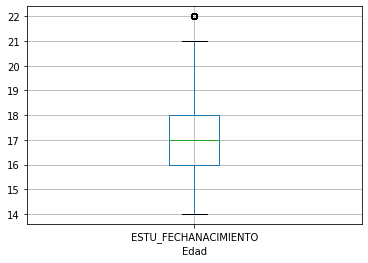

In [47]:
hist = data.boxplot(column=['ESTU_FECHANACIMIENTO'])
hist.set_xlabel("Edad")

In [31]:
dataAge = data[data['ESTU_FECHANACIMIENTO'] > 22]
dataAge.groupby("ESTU_FECHANACIMIENTO").size()/data.shape[0]*100

ESTU_FECHANACIMIENTO
23    0.398030
24    0.312850
25    0.255073
26    0.214574
27    0.204077
28    0.190330
29    0.165343
30    0.141006
dtype: float64

## tabla de contingencia

In [38]:
pd.crosstab(data['FAMI_TIENESERVICIOTV'], [data['FAMI_TIENECOMPUTADOR']],[data['FAMI_TIENEAUTOMOVIL']] )/data.shape[0]*100

FAMI_TIENECOMPUTADOR,-,No,Si
FAMI_TIENESERVICIOTV,,,
-,1.376337,2.109975,2.023495
No,0.287863,14.776421,7.796086
Si,0.768936,23.548399,47.312487


In [39]:
pd.crosstab(data['FAMI_EDUCACIONPADRE'], [data['FAMI_EDUCACIONMADRE']])/data.shape[0]*100

FAMI_EDUCACIONMADRE,-,Educación profesional completa,Educación profesional incompleta,Ninguno,No Aplica,No sabe,Postgrado,Primaria completa,Primaria incompleta,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,Técnica o tecnológica completa,Técnica o tecnológica incompleta
FAMI_EDUCACIONPADRE,,,,,,,,,,,,,
-,4.883550,0.019135,0.004459,0.006224,0.000650,0.002972,0.002415,0.031675,0.044401,0.066601,0.038177,0.023780,0.008174
Educación profesional completa,0.017370,3.796190,0.512190,0.019600,0.012819,0.102178,0.417072,0.143421,0.156147,1.383304,0.442245,1.219448,0.249407
Educación profesional incompleta,0.004923,0.421252,0.319910,0.007896,0.006781,0.021457,0.089452,0.046352,0.041800,0.359852,0.148623,0.290929,0.097534
Ninguno,0.021364,0.050160,0.019878,0.890992,0.007803,0.027124,0.007431,0.468625,1.033762,0.383260,0.417258,0.066787,0.045609
No Aplica,0.001951,0.100042,0.026473,0.013562,0.047373,0.017184,0.026659,0.087409,0.121406,0.221169,0.130788,0.109702,0.032418
No sabe,0.011797,0.560585,0.143885,0.053597,0.013562,0.906783,0.097534,0.475035,0.648551,1.357202,0.818446,0.577491,0.155589
Postgrado,0.002136,0.481165,0.081742,0.002415,0.004737,0.019042,0.726300,0.013655,0.012912,0.123450,0.035762,0.157261,0.032233
Primaria completa,0.026288,0.272351,0.075333,0.218475,0.008824,0.067530,0.034183,3.503590,1.789322,2.273738,1.641257,0.466303,0.166643
Primaria incompleta,0.040593,0.332171,0.096047,0.600714,0.014398,0.107658,0.035948,2.985083,8.199503,2.929071,2.962232,0.586873,0.214109


# Entropia

In [ ]:
columnEval = ["FAMI_TIENESERVICIOTV","FAMI_TIENECOMPUTADOR","FAMI_TIENEAUTOMOVIL","FAMI_TIENEMOTOCICLETA","FAMI_TIENECONSOLAVIDEOJUEGOS"]

In [ ]:
def EntropySum(n):
    if n == 0:
        return 0
    if n == 1:
        return 0
    else:
        return n*math.log(n,2)+(1-n)*math.log(1-n,2)

def compare(i,j,colPass):
    count = 0
    for col in columnEval:
        if data.iloc[i][col] == data.iloc[j][col]:
            if col != colPass:
                count+=1
    return count

In [ ]:
entropy = 0
dataSize = 1000 #data.shape[0]
for i in range(dataSize):
    for j in range(i+1,dataSize):
        result = compare(i, j, "")
        entropy += EntropySum(result/data.shape[1])
        #if j%100 == 0:
        #    print("R",i,j,"=",result)
    print("R",i,j,"=",entropy)
print("EntropyTotal",entropy*-1)